In [40]:
# Import the requests library.
import requests
# Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
from citipy import citipy
# Import the random module.
import random
# Import the NumPy module.
import numpy as np
# Import timeit.
import timeit
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the API key.
from config import 	weather_api_key

In [41]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [42]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [43]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-10.932965343401236 -114.58275837766183
-60.65139793579483 -134.73249511453247
-4.453398252311885 -20.82875263207052
-56.87981610897538 -45.58776195892281
60.15574668014426 144.56976943207025
-16.429122477872994 86.07501379819905
59.34450962786559 -110.25094897215146
-68.81328846735042 179.6750108578562
20.216551884607185 -75.00413882232024
37.76859904361615 9.257025672458525
-81.83241669309285 176.11568951030796
-22.92179079822664 -8.993399171916678
63.809745307349345 -156.7622331957604
22.88892040719732 23.614210139033247
-38.10458184859569 -95.08100423692932
22.5382776283774 -171.44181508791246
19.42985752409639 -177.38705755358174
85.88061692211963 56.07304257467135
82.58645882629543 -72.81607823035493
-23.418008566479543 31.97152733484586
47.90068931749772 -1.2657218701216948
35.166859258793465 -173.94724436468223
66.95359117569151 -103.16259451005233
41.76965731776832 49.43942731170765
20.849787776662865 -68.92953166381602
-16.916930885491738 36.78081195938634
-44.23253916657989 

In [44]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [45]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [46]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1d141a9c12deef6bbe73f7c0c87f527c


In [47]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [48]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | mar del plata
Processing Record 4 of Set 1 | okhotsk
Processing Record 5 of Set 1 | hithadhoo
Processing Record 6 of Set 1 | grand centre
City not found. Skipping...
Processing Record 7 of Set 1 | kaitangata
Processing Record 8 of Set 1 | guantanamo
Processing Record 9 of Set 1 | sajanan
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | jalu
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | phalaborwa
Processing Record 19 of Set 1 | vitre
Processing Record 20 of Set 1 | la ronge
Processing Record 21 of Set 1 | xacmaz
Processing Record 22 of Set 1 | s

Processing Record 35 of Set 4 | taoudenni
Processing Record 36 of Set 4 | merauke
Processing Record 37 of Set 4 | ayan
Processing Record 38 of Set 4 | camacha
Processing Record 39 of Set 4 | zhigansk
Processing Record 40 of Set 4 | tezu
Processing Record 41 of Set 4 | las choapas
Processing Record 42 of Set 4 | isangel
Processing Record 43 of Set 4 | chapais
Processing Record 44 of Set 4 | omsukchan
Processing Record 45 of Set 4 | namibe
Processing Record 46 of Set 4 | plettenberg bay
Processing Record 47 of Set 4 | bathsheba
Processing Record 48 of Set 4 | pevek
Processing Record 49 of Set 4 | antalaha
Processing Record 50 of Set 4 | digby
Processing Record 1 of Set 5 | saint-pierre
Processing Record 2 of Set 5 | vardo
Processing Record 3 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 4 of Set 5 | sola
Processing Record 5 of Set 5 | dingle
Processing Record 6 of Set 5 | aflu
City not found. Skipping...
Processing Record 7 of Set 5 | belmonte
Processing Record 8 o

Processing Record 23 of Set 8 | kjollefjord
Processing Record 24 of Set 8 | marsh harbour
Processing Record 25 of Set 8 | yulara
Processing Record 26 of Set 8 | celestun
Processing Record 27 of Set 8 | diu
Processing Record 28 of Set 8 | nikolskoye
Processing Record 29 of Set 8 | touros
Processing Record 30 of Set 8 | sosva
Processing Record 31 of Set 8 | antequera
Processing Record 32 of Set 8 | mpika
Processing Record 33 of Set 8 | lugovoy
Processing Record 34 of Set 8 | capitan bado
Processing Record 35 of Set 8 | yumen
Processing Record 36 of Set 8 | acapulco
Processing Record 37 of Set 8 | sohag
Processing Record 38 of Set 8 | wulanhaote
City not found. Skipping...
Processing Record 39 of Set 8 | manzhouli
Processing Record 40 of Set 8 | rio grande
Processing Record 41 of Set 8 | elizabeth city
Processing Record 42 of Set 8 | maun
Processing Record 43 of Set 8 | solovetskiy
City not found. Skipping...
Processing Record 44 of Set 8 | mananjary
Processing Record 45 of Set 8 | haines

Processing Record 11 of Set 12 | batsfjord
Processing Record 12 of Set 12 | kandalaksha
Processing Record 13 of Set 12 | road town
Processing Record 14 of Set 12 | cruden bay
City not found. Skipping...
Processing Record 15 of Set 12 | saint-joseph
Processing Record 16 of Set 12 | korla
Processing Record 17 of Set 12 | grand gaube
Processing Record 18 of Set 12 | grand forks
Processing Record 19 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 20 of Set 12 | abrau-dyurso
Processing Record 21 of Set 12 | toliary
City not found. Skipping...
Processing Record 22 of Set 12 | waw
Processing Record 23 of Set 12 | key west
Processing Record 24 of Set 12 | havre-saint-pierre
Processing Record 25 of Set 12 | luwuk
Processing Record 26 of Set 12 | tarakan
Processing Record 27 of Set 12 | langxiang
Processing Record 28 of Set 12 | alice
Processing Record 29 of Set 12 | chunoyar
Processing Record 30 of Set 12 | lata
Processing Record 31 of Set 12 | volkermarkt
City 

In [70]:
# Print the city count to confirm sufficient count.
len(city_data)

562

In [71]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,76.77,70,26,14.70,PF,2021-04-04 17:00:11
1,Georgetown,5.4112,100.3354,84.99,89,20,4.38,MY,2021-04-04 16:58:59
2,Mar Del Plata,-38.0023,-57.5575,75.00,78,40,17.27,AR,2021-04-04 17:03:05
3,Okhotsk,59.3833,143.3000,18.55,97,100,2.71,RU,2021-04-04 17:04:19
4,Hithadhoo,-0.6000,73.0833,83.82,74,75,17.34,MV,2021-04-04 17:03:30
5,Kaitangata,-46.2817,169.8464,63.00,48,37,15.01,NZ,2021-04-04 17:04:00
6,Guantanamo,20.1444,-75.2092,86.00,48,40,17.27,CU,2021-04-04 17:01:04
7,Sajanan,37.0573,9.2426,66.20,68,40,9.22,TN,2021-04-04 17:05:40
8,Bluff,-46.6000,168.3333,57.99,74,76,5.99,NZ,2021-04-04 17:03:20
9,Jamestown,42.0970,-79.2353,54.00,35,1,6.91,US,2021-04-04 17:03:06


In [72]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-04-04 17:00:11,-23.1203,-134.9692,76.77,70,26,14.70
1,Georgetown,MY,2021-04-04 16:58:59,5.4112,100.3354,84.99,89,20,4.38
2,Mar Del Plata,AR,2021-04-04 17:03:05,-38.0023,-57.5575,75.00,78,40,17.27
3,Okhotsk,RU,2021-04-04 17:04:19,59.3833,143.3000,18.55,97,100,2.71
4,Hithadhoo,MV,2021-04-04 17:03:30,-0.6000,73.0833,83.82,74,75,17.34
5,Kaitangata,NZ,2021-04-04 17:04:00,-46.2817,169.8464,63.00,48,37,15.01
6,Guantanamo,CU,2021-04-04 17:01:04,20.1444,-75.2092,86.00,48,40,17.27
7,Sajanan,TN,2021-04-04 17:05:40,37.0573,9.2426,66.20,68,40,9.22
8,Bluff,NZ,2021-04-04 17:03:20,-46.6000,168.3333,57.99,74,76,5.99
9,Jamestown,US,2021-04-04 17:03:06,42.0970,-79.2353,54.00,35,1,6.91


In [74]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [75]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [76]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1617556020.7261078

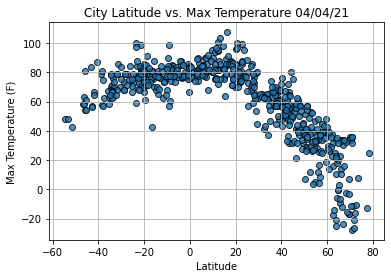

In [77]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

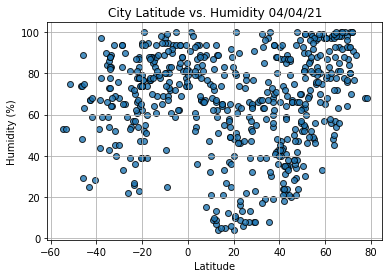

In [78]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

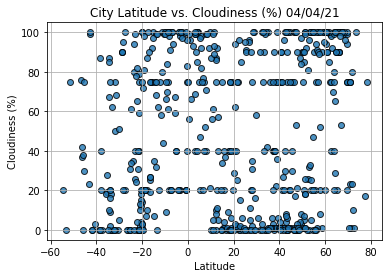

In [79]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

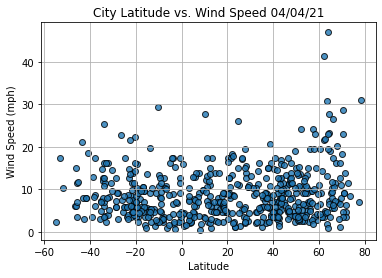

In [80]:
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1,marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [81]:
# x value = independent variable
# y value = dependent variable

In [82]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perfrom linear regression on the weather data
# and plot a regressio line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Perform linear regression.
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y_values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y = "+ str(round(slope,2))+"x + "+str(round(intercept,2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values, regress_values,"r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [83]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

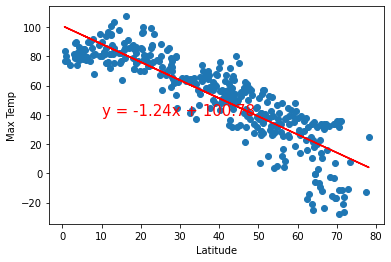

In [84]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

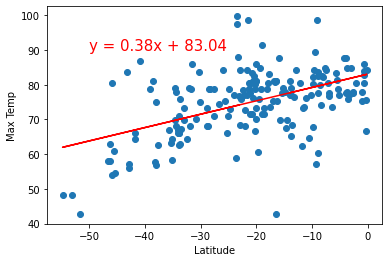

In [85]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

#### **Finding**

The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

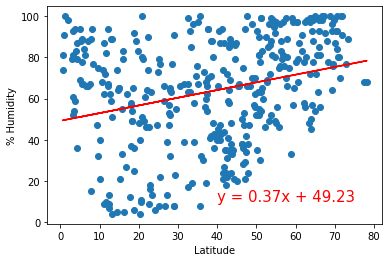

In [86]:
# Linear regression on the Northern Hemisphere for %Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

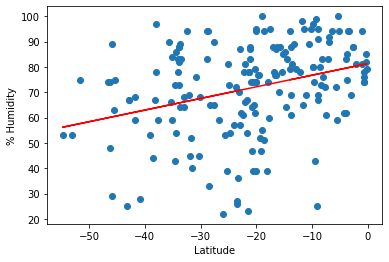

In [87]:
# Linear regression on the Southern Hemisphere for %Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

#### **Finding**

The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 

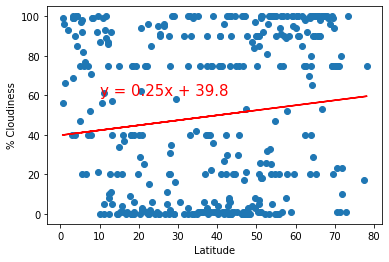

In [88]:
# Linear regression on the Northern Hemisphere for % cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness','% Cloudiness',(10,60))

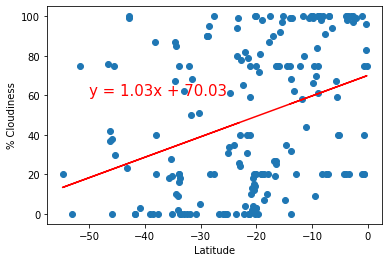

In [89]:
# Linear regression on the Southern Hemisphere for % cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

#### **Finding**

The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. Check the r-values for your plots

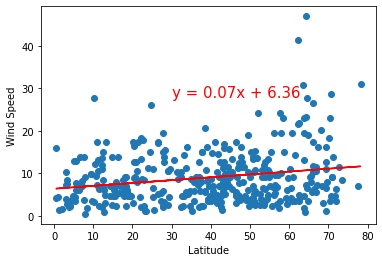

In [90]:
# Linear regression on the Northern Hemisphere for wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(30,28))

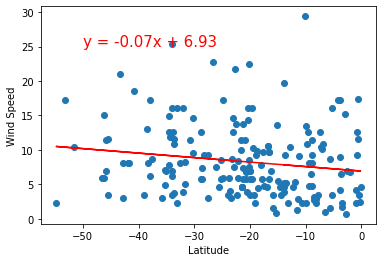

In [91]:
# Linear regression on the Southern Hemisphere for wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))

#### **Finding**

The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your plots. 